<a href="https://colab.research.google.com/github/Yanni-Dhevictor/Projetos-de-Data-Science/blob/master/%5BPROJETO%5DPANORAMA_DO_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Panorama do COVID-19 no mundo

O covid-19 ou Corona-vírus, como é comumente chamado é um vírus respiratório silencioso e com alta capacidade de transmissão, por ser espalhada pelo ar, implicando em sintomas e complicações muito mais sérias que sua versão anterior causou.
A China teve seu primeiro caso no final do ano de 2019, quando 4 pessoas deram entrada no Hospital de Wuhan na china, com o tempo essa doença foi se espalhando tornando casos de dezenas para centenas,milhares escapando da China e se proliferando pelos continentes até que no dia 28 de setembro de 2020 a doença ultrapassou a marca de [1 milhao de mortos pelo Covid-19](https://g1.globo.com/bemestar/coronavirus/noticia/2020/09/28/mundo-ultrapassa-a-marca-de-1-milhao-de-mortos-por-covid-19-diz-universidade.ghtml) em todo o mundo.

<center><img alt="covid-19-banner" width="60%" src = "https://raw.githubusercontent.com/Yanni-Dhevictor/Projetos-de-Data-Science/master/Covid-banner.jpg"><center/>


Um método de se proteger atualmente é o uso de máscara ao sair de casa, lavar as mãos com frequência e o uso de álcool em gel 70%, não compartilhar objetos de uso pessoal como talheres, pratos e copos, mantenha distância de 1 metro e meio entre as pessoas em lugares públicos.
Depois

No período do desenvolvimento desse projeto, o Brasil sozinho alcançou a marca de mais de 5 milhões casos confirmados e com mais de 4 milhões de casos recuperados. Não só o Brasil, como o resto do mundo está nessa batalha pela sobrevivência e a procura da cura, enquanto ela não chega devemos seguir as medidas profiláticas para proteger a nós e ao próximo.

<center><img alt="medidas_profiláticas" width = "50%" src = "https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/3749898.jpg">

Visando a meta de tomar mais consciência da real proporção dos casos atualmente a respeito do COVID-19, realizarei nesse projeto uma análise dos dados públicos sobre a doença.


##Obtendo os dados

Os dados que serão analisados nesse projeto foram obtidos do repositório do [Our World in Data]("https://github.com/owid/covid-19-data/tree/master/public/data"), repositório esse que é periodicamente atualizado com novos dados, então no periodo em que estiver lendo esse projeto, os valores podem ter se alterado. Os dados podem ser importados em CSV, XLSX e JSON, por meio desse [link]("https://github.com/owid/covid-19-data/tree/master/public/data").

Há um certo desafio ao realizar análises em dados públicos pois podem ter sido alterados ou mal preenchidos, entrando em conflito com dados oriundos de outros órgãos como os do governo federal e estaduais e outros não oficiais, ainda mais difícil quando os dados são sobre alguma nova doença, onde casos de pessoas com sintomas parecidos podem ser diagnosticados erroneamente, tornando boa parcela dos dados impuros, então vale lembrar que não tome essa análise como a única verdade, existem muitas formas de abordar os dados aqui presentes.

<center><img alt ="lupe and search" , width = "60%" src="https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/Business_performance.jpg"></center>

##Importanto as bibliotecas

Nessa etapa eu começo com a importação das bibliotecas necessárias para uma análise precisa dos dados disponíveis, que são as bibliotecas `pandas`,`matplotlib`,`seaborn` e um pacote da biblioteca de `CloudWords`.

In [1]:
#IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
#Importanto o arquivo csv.
DATA_PATH = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df_world = pd.read_csv(DATA_PATH) 

###Dicionário das variáreis

Segue abaixo as variáveis presentes no dataset do repositório
* `iso_code` - Códigos de país de 3 letras
* `continent` - Nome dos continentes
* `column` - Descrição da coluna
* `location` - Localização geográfica
* `date` - Data da observação
* `total_cases` - Total de casos confirmados do COVID-19
* `new_cases` - Novos casos confirmados do COVID-19
* `new_cases_smoothed` - Novos casos confirmados do COVID-19 (Suavizado por 7 dias)
* `total_deaths` - Total de casos atribuidos ao COVID-19
* `new_deaths` - Novas mortes atribuidas ao COVID-19
* `new_deaths_smoothed` - Novas mortes atribuidas ao COVID-19 (suavizado por 7 dias)
* `total_cases_per_million` - Casos totais confirmados do COVID-19 por 1 milhão de pessoas
* `new_cases_per_million` - Novos casos confirmados por 1 milhão de pessoas
* `new_cases_smoothed_per_million` - Novos casos confirmados do COVID-19 (suavizado por 7 dias) por 1 milhão de pessoas
* `total_deaths_per_million` - Total de mortes atribuidas ao COVID-19 por 1 milhão de pessoas
* `new_deaths_per_million` - Novas mortes atribuídas ao COVID-19 por 1 milhão de pessoas 
* `new_deaths_smoothed_per_million` - Novas mortes atribuídas ao COVID-19(suavizado por 7 dias) por 1 milhão de pessoas
* `reproduction_rate` - Estimativa em tempo real da taxa efetiva de reprodução (R) de COVID-19
* `icu_patients` - Número de pacientes de COVID-19 em unidades de tratamento  em um determinado dia.
* `icu_patients_per_million` - dias) por 1 milhão de pessoas
* `hosp_patients` - hosp_patients_per_million
* `hosp_patients_per_million` - Número de pacientes COVID-19 no hospital em um determinado dia por 1.000.000 de pessoas
* `weekly_icu_admissions` - Número de pacientes COVID-19 recém-admitidos em unidades de terapia intensiva (UTI) em uma determinada semana
* `weekly_icu_admissions_per_million` - Número de pacientes COVID-19 recém-admitidos em unidades de terapia intensiva (UTI) em uma determinada semana por 1.000.000 de pessoas
* `weekly_hosp_admissions` - Número de pacientes COVID-19 recém-admitidos em hospitais em uma determinada semana
* `weekly_hosp_admissions_per_million `- Número de pacientes COVID-19 recém-admitidos em hospitais em uma determinada semana por 1.000.000 de pessoas
* `total_tests` - Total de testes para o COVID-19
* `new_tests` - Novos testes para o COVID-19
* `total_tests_per_thousand` - Total de testes para o COVID-19 a cada mil pessoas
* `new_tests_per_thousand` - Novos testes para o COVID-19 a cada mil pessoas
* `new_tests_smoothed` - Novos teste para o COVID-19 (suavizado por 7 dias). Para países que não relatam dados de teste diariamente, presumimos que os testes mudaram igualmente diariamente em qualquer período em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que é então calculada em média ao longo de uma janela contínua de 7 dias
* `new_tests_smoothed_per_thousand` - Novos testes para COVID-19(suavidade por 7 dias) a cada mil pessoas
* `positive_rate` - Uma parte dos teste do COVID-19 que são positivos, dados como uma média contínua de 7 dias (Inverso do `tests_per_case`)
* `tests_per_case` - Testes conduzidos por novos casos confirmados do COVID-19 dado como uma médias contínua de 7 dias(Inverso do `positive-rate`)
* `tests_units` - Unidades usadas pelo local para relatar seus dados testados
* `total_vaccinations` - Número de doses de vacinação COVID-19 
* `people_vaccinated` - Número total de pessoas que receberam pelo menos uma dose de vacina
* `people_fully_vaccinated` - Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação
* `new_vaccinations` - Novas doses da vacinação do COVID- 19 administradas dentro de um período de 7 dias, devido a não divulgação dos dados diariamente. Por isso é feito uma série de números diários(supondo que os dados mudaram igualmente diariamemente), no qual é então calculado o valor médio dentro desse período de 7 dias.
* `new_vaccinations_smoothed` - Novas doses de vacinação COVID-19 administradas (suavização de 7 dias). Para países que não relatam dados de vacinação diariamente, presumimos que a vacinação mudou igualmente diariamente em quaisquer períodos em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que é então calculada em média ao longo de uma janela contínua de 7 dias
* `total_vaccinations_per_hundred` - Número de doses de vacinação COVID-19 administradas para 100 pessoas na população total
* `people_vaccinated_per_hundred` - Número total de pessoas que receberam pelo menos uma dose de vacina por 100 pessoas na população total

* `people_fully_vaccinated_per_hundred` - Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação por 100 pessoas na população total
Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação por 100 pessoas na população total
Total number of people who received all doses prescribed by the vaccination protocol per 100 people in the total population
* `new_vaccinations_smoothed_per_million` - Novas doses de vacinação COVID-19 administradas (suavizadas em 7 dias) por 1.000.000 de pessoas na população total
* `stringency_index` - Índice de Restrição de Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamentos de escolas, fechamentos de locais de trabalho e proibições de viagens, redimensionado para um valor de 0 a 100 (100 = resposta mais estrita)
* `population` - População em 2020
* `population_density` - Número de pessoas dividido por área terrestre, medido em quilômetros quadrados, ano mais recente disponível
* `median_age` - Idade média da população, projeção da ONU para 2020
* `aged_65_older` - Parcela da população com 65 anos ou mais, ano mais recente disponível
* `aged_70_older` - Parcela da população com 70 anos ou mais em 2015
* `gdp_per_capita` - Produto interno bruto em paridade de poder de compra (dólares internacionais constantes de 2011), ano mais recente disponível)
* `extreme_poverty` - Parcela da população que vive em pobreza extrema, ano mais recente disponível desde 2010
* `cardiovasc_death_rate` - Taxa de mortalidade por doenças cardiovasculares em 2017 (número anual de mortes por 100.000 pessoas)
* `diabetes_prevalence` - Prevalência de diabetes (% da população de 20 a 79 anos) em 2017
* `female_smokers`- Parcela de mulheres que fumam, ano mais recente disponível
* `male_smokers` - Parcela de homens que fumam, ano mais recente disponível
* `handwashing_facilities` - Parcela da população com instalações básicas de lavagem das mãos no local, ano mais recente disponível
* `hospital_beds_per_thousand` - Leitos hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010
* `life_expectancy` - Expectativa de vida ao nascer em 2019
* `human_development_index` - Medida resumida do desempenho médio nas principais dimensões do desenvolvimento humano: uma vida longa e saudável, ter conhecimento e um padrão de vida decente.

####Antes de realizar uma análise mais profunda primeiro temos que verificar o formato desse dataset por meio do `df.head()`.

###Analisando as 5 primeiras entradas

Com o `df_world.head()` podemos ver as 5 primeiras entradas do dataset

In [4]:
df_world.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


###Analisando as 5 últimas entradas
Com o `df_world.tail()` é possível ver as 5 ultimas entradas do dataset

In [5]:
df_world.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
72974,ZWE,Africa,Zimbabwe,2021-03-01,36115.0,26.0,36.143,1468.0,5.0,3.857,2429.871,1.749,2.432,98.769,0.336,0.260,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2041.0,383201.0,25.782,0.137,1863.0,0.125,0.019,51.5,tests performed,21456.0,21456.0,NaN,2613.0,2877.0,0.14,0.14,NaN,194.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72975,ZWE,Africa,Zimbabwe,2021-03-02,36148.0,33.0,34.000,1472.0,4.0,3.429,2432.092,2.220,2.288,99.038,0.269,0.231,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2207.0,385408.0,25.931,0.148,1911.0,0.129,0.018,56.2,tests performed,25077.0,25077.0,NaN,3621.0,3005.0,0.17,0.17,NaN,202.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72976,ZWE,Africa,Zimbabwe,2021-03-03,36179.0,31.0,31.286,1478.0,6.0,3.143,2434.177,2.086,2.105,99.442,0.404,0.211,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1903.0,387311.0,26.059,0.128,1925.0,0.130,0.016,61.5,tests performed,27970.0,27970.0,NaN,2893.0,2871.0,0.19,0.19,NaN,193.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72977,ZWE,Africa,Zimbabwe,2021-03-04,36223.0,44.0,32.714,1483.0,5.0,3.571,2437.138,2.960,2.201,99.778,0.336,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2054.0,389365.0,26.197,0.138,1795.0,0.121,0.018,54.9,tests performed,30658.0,30658.0,NaN,2688.0,2807.0,0.21,0.21,NaN,189.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72978,ZWE,Africa,Zimbabwe,2021-03-05,36248.0,25.0,29.143,1484.0,1.0,3.000,2438.820,1.682,1.961,99.846,0.067,0.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31325.0,31325.0,NaN,667.0,2678.0,0.21,0.21,NaN,180.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [6]:
df_world.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.192800e+04,71926.000000,70925.000000,6.279400e+04,62952.000000,70925.000000,71535.000000,71533.000000,70537.000000,62414.000000,62572.000000,70537.000000,58568.000000,7639.000000,7639.000000,9185.000000,9185.000000,645.000000,645.000000,1229.000000,1229.000000,3.293800e+04,3.276300e+04,32763.000000,32938.000000,3.757800e+04,37578.000000,36371.000000,35810.000000,3.286000e+03,2.858000e+03,1.892000e+03,2.771000e+03,4.903000e+03,3286.000000,2858.000000,1892.000000,4903.000000,62327.000000,7.257700e+04,68178.000000,66296.000000,65532.000000,65922.000000,66493.000000,45400.000000,67136.000000,67980.000000,52787.000000,52062.000000,33687.000000,61462.000000,69341.000000,67075.000000
mean,6.240562e+05,5126.345994,5142.195247,1.868897e+04,131.826709,115.641731,7365.988584,65.643938,65.512468,174.957114,1.387007,1.212917,1.017381,994.681896,22.767916,4593.413283,152.453856,250.520778,18.316567,3660.527709,104.854852,3.754542e+04,4.447910e+06,164.265471,1.496705,3.609023e+04,1.432512,0.087931,162.657948,4.437156e+06,3.286667e+06,1.399009e+06,1.926501e+05,1.170504e+05,6.994391,5.188268,2.639931,2344.053845,58.934356,1.313382e+08,327.493394,30.563569,8.803206,5.579806,19128.936877,13.268667,257.106753,7.794368,10.551829,32.647859,51.018143,3.036691,73.139466,0.727951
std,4.398841e+06,32209.424466,31945.750071,1.090782e+05,723.265456,659.284582,14564.002028,167.480662,140.397183,312.439727,3.874682,2.779214,0.350311,3105.659798,25.485786,12754.467527,189.762842,515.013730,32.746507,11579.757940,223.149422,1.466780e+05,2.064092e+07,339.344043,4.051780,1.348375e+05,3.236862,0.099825,864.354263,2.139369e+07,1.364667e+07,5.550984e+06,8.251820e+05,5.431965e+05,14.241411,9.599398,6.160413,4469.815368,22.082459,6.988720e+08,1591.527771,9.118104,6.242939,4.263850,19685.587640,19.917950,118.409960,3.934928,10.410581,13.465527,31.768640,2.467943,7.549649,0.150142
min,1.000000e+00,-74347.000000,-5648.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,1.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,-1.107600e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,7.210000e+02,2.000000,5.714000,3.600000e+01,0.000000,0.000000,141.400500,0.129000,0.984000,5.539000,0.000000,0.000000,0.870000,20.000000,3.139000,82.000000,17.582000,7.823000,1.356000,40.669000,7.874000,1.314000e+03,1.017130e+05,8.379000,0.105000,1.370000e+03,0.106000,0.015000,7.900000,3.204425e+04,2.940350e+04,1.586975e+04,2.346000e+03,1.091500e+03,0.540000,0.530000,0.260000,296.000000,44.440000,2.722291e+06,36.253000,22.

##Análise Exploratória dos Dados

A partir de agora irei fazer uma investigação dos dados, obtendo dessa forma as primeiras impressões de seu conteúdo.

Primeiramente utilizarei o `shape` para identificar os atributos e as entradas existentes no dataset, assim como os tipos de dados de cada coluna.

<center><img alt= "data-report" src = "https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/data-report.jpg" width = "40%"></center>

In [7]:
#Identificando o volume de dados
print("Entradas:\t {}".format(df_world.shape[0]))
print("Variáveis:\t {}\n".format(df_world.shape[1]))

#Verificando o tipo de cada atributo
display(df_world.dtypes)

Entradas:	 72979
Variáveis:	 59



iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

Por meio do comando `df_world columuns` também vemos o nome de todas as colunas no dataset.

In [ ]:
df_world.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

##Identificando valores ausentes 
Dando avanço a pesquisa no dataset, precisamos verificar a quantidade de dados ausentes existentes em casa atributo do dataset.

<center><img alt = "pesquisa" src = "https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/search-engine.jpg" width = 50% ></center>

In [ ]:
#Visualização dos dados ausentes no dataset

(df_world.isnull().sum() / df_world.shape[0]).sort_values(ascending=False) * 100

weekly_icu_admissions                    99.005493
weekly_icu_admissions_per_million        99.005493
weekly_hosp_admissions                   98.360519
weekly_hosp_admissions_per_million       98.360519
people_fully_vaccinated                  97.712772
people_fully_vaccinated_per_hundred      97.712772
new_vaccinations                         96.506047
people_vaccinated                        96.500499
people_vaccinated_per_hundred            96.500499
total_vaccinations                       95.863848
total_vaccinations_per_hundred           95.863848
new_vaccinations_smoothed                93.930315
new_vaccinations_smoothed_per_million    93.930315
icu_patients                             89.440468
icu_patients_per_million                 89.440468
hosp_patients                            87.298879
hosp_patients_per_million                87.298879
total_tests                              54.632712
total_tests_per_thousand                 54.632712
new_tests                      

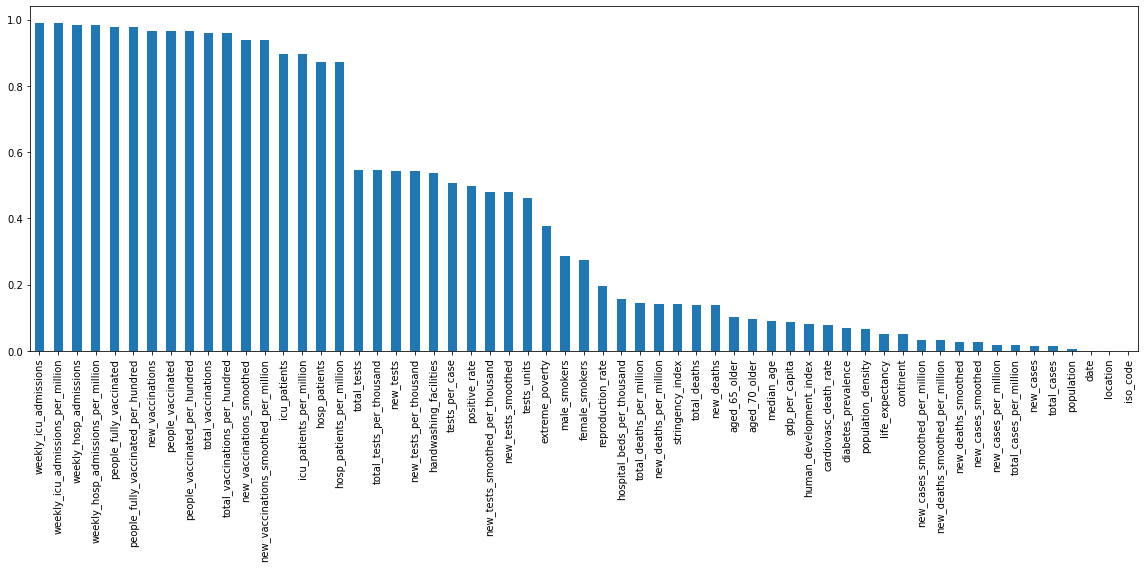

In [ ]:
#Plotando os dados de valores ausentes com o gráfico de barras

(df_world.isnull().sum() / df_world.shape[0]).sort_values(ascending=False).plot(kind="bar",figsize=(16,8));
plt.tight_layout()
plt.show()

Com esses dados, podemos notar que os primeiros 8 atributos

* `new_vaccinations`
* `total_vaccinations` 
* `total_vaccinations_per_hundred`
* `weekly_icu_admissions`
* `weekly_icu_admissions_per_million`
* `weekly_hosp_admissions`
* `weekly_hosp_admissions_per_million`
* `icu_patients` 
* `icu_patients_per_million`
* `hosp_patients`
* `hosp_patients_per_million`
* `people_fully_vaccinated`
* `people_fully_vaccinated_per_hundred`
* `people_vaccinated`
* `new_vaccinations_smoothed`
* `new_vaccinations_smoothed_per_million`

Se encontram com valores ausentes acima de 90%. Nesse dataset em específico, que está passando por constantes atualizações com novos dados, tabelas que são recentemente inseridas possuirão sim valores faltantes, pois é necessário uma catalogação desse tipo de informação para que seja formatado e introduzido dentro do dataset.

In [8]:
df_wcopy = df_world

In [9]:
df_wcopy.drop(columns=['people_fully_vaccinated','people_fully_vaccinated_per_hundred','weekly_icu_admissions'
,'weekly_icu_admissions_per_million','people_vaccinated','people_vaccinated_per_hundred'
,'new_vaccinations','total_vaccinations','total_vaccinations_per_hundred','weekly_hosp_admissions'
,'weekly_hosp_admissions_per_million','new_vaccinations_smoothed','new_vaccinations_smoothed_per_million'
,'people_fully_vaccinated','people_fully_vaccinated_per_hundred','new_vaccinations_smoothed'
,'new_vaccinations_smoothed_per_million'],inplace = True)

In [10]:
(df_wcopy.isnull().sum() / df_wcopy.shape[0]).sort_values(ascending=False) * 100

icu_patients_per_million           89.532605
icu_patients                       89.532605
hosp_patients                      87.414188
hosp_patients_per_million          87.414188
total_tests_per_thousand           55.106263
total_tests                        55.106263
new_tests_per_thousand             54.866468
new_tests                          54.866468
handwashing_facilities             53.840146
tests_per_case                     50.931090
positive_rate                      50.162375
new_tests_smoothed_per_thousand    48.508475
new_tests_smoothed                 48.508475
tests_units                        46.718919
extreme_poverty                    37.790323
male_smokers                       28.661670
female_smokers                     27.668233
reproduction_rate                  19.746776
hospital_beds_per_thousand         15.781252
stringency_index                   14.595980
total_deaths_per_million           14.476767
new_deaths_per_million             14.260267
total_deat

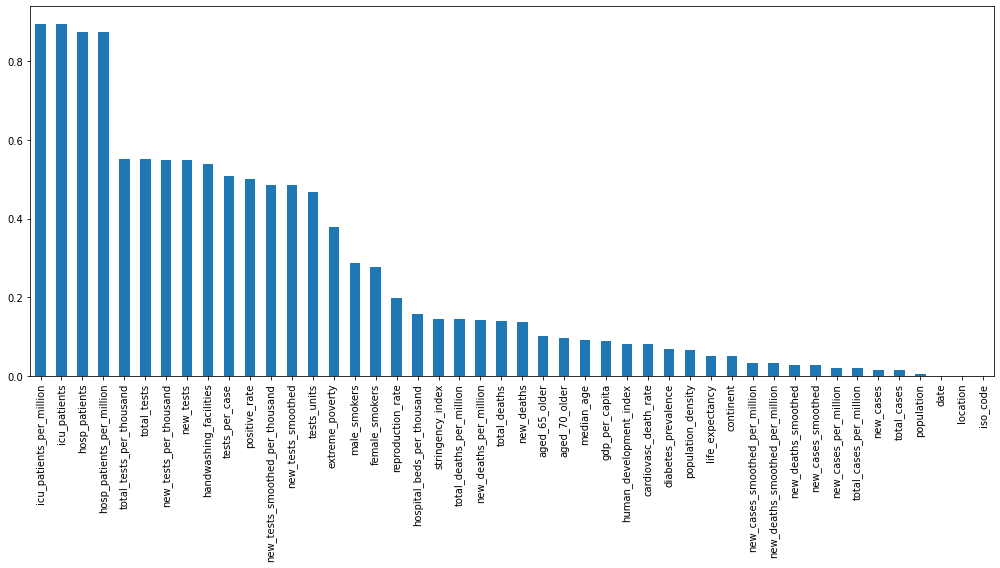

In [11]:
#Plotando as variáveis que não foram retiradas

(df_wcopy.isnull().sum() / df_wcopy.shape[0]).sort_values(ascending=False).plot(kind="bar",figsize=(14,8));
plt.tight_layout()
plt.show()

Após as variáveis com alta quantidade de valores ausentes serem retirados, é possível realizar uma leitura mais acertiva com os dados.

In [ ]:
(df_wcopy.isnull().sum() / df_wcopy.shape[0]).sort_values(ascending=False) * 100

In [13]:
#Definindo a coluna data para o formato `datetime`
df_world.date = pd.to_datetime(df_world.date)

In [14]:
df_world.set_index('date').isna().sum(level=0)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24,0,9,0,12,12,21,44,40,21,13,13,22,45,41,22,52,55,55,56,56,45,41,41,45,39,39,47,50,34,9,1,9,8,9,8,9,24,8,9,12,12,43,9,8,9
2020-02-25,0,9,0,12,12,26,49,45,26,13,13,27,50,46,27,57,60,60,60,60,44,43,43,44,43,43,52,55,38,9,1,9,8,9,8,9,24,8,9,12,12,46,9,8,9
2020-02-26,0,9,0,13,13,31,56,52,31,14,14,32,57,53,32,64,66,66,66,66,49,46,46,49,50,50,58,62,43,10,1,9,8,9,9,9,25,8,9,13,13,52,9,8,9
2020-02-27,0,9,0,12,12,34,59,55,34,13,13,35,60,56,35,66,66,66,67,67,49,48,48,49,52,52,59,63,44,10,1,9,9,10,10,9,27,9,9,14,14,55,9,8,10
2020-02-28,0,9,0,11,11,36,63,59,36,12,12,37,64,60,37,70,70,70,71,71,52,51,51,52,56,56,63,67,47,10,1,9,9,10,10,9,30,9,9,14,14,57,11,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-08,0,7,0,9,9,11,38,34,11,10,10,11,38,34,11,40,41,41,41,41,34,34,34,34,33,33,35,38,27,7,1,7,6,7,6,7,17,6,7,7,7,33,7,6,7
2020-02-09,0,7,0,15,15,16,44,40,16,16,16,16,44,40,16,46,47,47,47,47,40,40,40,40,37,37,41,44,33,7,1,7,6,7,6,7,19,6,7,7,7,39,7,6,7
2020-02-10,0,7,0,9,9,10,38,34,10,10,10,10,38,34,10,40,41,41,41,41,34,34,34,34,31,31,35,38,27,7,1,7,6,7,6,7,17,6,7,7,7,33,7,6,7


###Países com mais casos e mortes

1.   A primeira parte busca o total de casos registrados até o momento.
2.   A segunda parte foca em obter o total de casos de morte por COVID-19 até o momento.



In [15]:
#Obtendo o total de casos de COVID-19

df_world.loc[df_world.date == '2021-01-14'].sort_values(by="total_cases",ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
71894,OWID_WRL,NaN,World,2021-01-14,93144039.0,754742.0,711101.714,2000835.0,15340.0,13664.286,11949.512,96.826,91.228,256.688,1.968,1.753,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737
22586,OWID_EUR,NaN,Europe,2021-01-14,27069554.0,257236.0,236502.429,614342.0,6057.0,5326.143,36156.371,343.586,315.893,820.567,8.090,7.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48341,OWID_NAM,NaN,North America,2021-01-14,26693021.0,267189.0,268607.857,571644.0,5249.0,4666.714,45084.064,451.278,453.674,965.497,8.865,7.882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69525,USA,North America,United States,2021-01-14,23343727.0,234901.0,238921.286,395125.0,3957.0,3410.571,70524.291,709.665,721.811,1193.722,11.955,10.304,0.96,28536.0,86.211,124597.0,376.423,2001080.0,275270679.0,831.627,6.046,1755586.0,5.304,0.135,7.4,tests performed,71.76,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
3772,OWID_ASI,NaN,Asia,2021-01-14,21840283.0,86556.0,82674.857,353823.0,1171.0,1157.571,4707.112,18.655,17.818,76.257,0.252,0.249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,BMU,North America,Bermuda,2021-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.41,6.227300e+04,1308.820,NaN,NaN,NaN,50669.315,NaN,139.547,13.00,NaN,NaN,NaN,NaN,82.59,NaN
12726,CYM,North America,Cayman Islands,2021-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.572000e+04,256.496,NaN,NaN,NaN,49903.029,NaN,NaN,13.22,NaN,NaN,NaN,NaN,83.92,NaN
26157,GIB,Europe,Gibraltar,2021-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.369100e+04,3457.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.93,NaN
48766,OWID_NCY,NaN,Northern Cyprus,2021-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Obtendo o total de mortes por COVID-19

df_world.loc[df_world.date == '2021-01-25'].sort_values(by="total_deaths",ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
71905,OWID_WRL,NaN,World,2021-01-25,99714128.0,496433.0,588991.857,2147336.0,10747.0,14306.286,12792.393,63.688,75.562,275.483,1.379,1.835,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
22597,OWID_EUR,NaN,Europe,2021-01-25,29275309.0,194468.0,201350.571,671312.0,4594.0,5608.286,39102.562,259.748,268.941,896.661,6.136,7.491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48352,OWID_NAM,NaN,North America,2021-01-25,28971530.0,171172.0,200185.571,619793.0,2869.0,4736.286,48932.427,289.107,338.110,1046.820,4.846,8.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23005,OWID_EUN,NaN,European Union,2021-01-25,18883993.0,140212.0,134001.000,450926.0,3286.0,3518.714,42443.659,315.140,301.181,1013.501,7.386,7.909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69536,USA,North America,United States,2021-01-25,25299108.0,151062.0,170462.143,427993.0,1956.0,3175.571,76431.739,456.377,514.987,1293.020,5.909,9.594,0.84,24990.0,75.498,106097.0,320.532,1192824.0,292203588.0,882.783,3.604,1602698.0,4.842,0.104,9.6,tests performed,71.76,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59725,SLB,Oceania,Solomon Islands,2021-01-25,17.0,0.0,0.000,NaN,NaN,0.000,24.750,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,6.868780e+05,21.841,20.8,3.507,2.043,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.567
66126,TLS,Asia,Timor,2021-01-25,67.0,0.0,2.143,NaN,NaN,0.000,50.818,0.000,1.625,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.30,1.318442e+06,87.176,18.0,3.556,1.897,6570.102,30.3,335.346,6.86,6.300,78.100,28.178,5.900,69.50,0.606
67632,TCA,North America,Turks and Caicos Islands,2021-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.871800e+04,37.312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.22,NaN
70366,VUT,Oceania,Vanuatu,2021-01-25,1.0,0.0,0.000,NaN,NaN,0.000,3.256,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,3.071500e+05,22.662,23.1,4.394,2.620,2921.909,13.2,546.300,12.02,2.800,34.500,25.209,NaN,70.47,0.609


###Plotagem  dos 5 países com o maior número de mortes

Nessa parte, o dataset é filtrado para que seja possível identificar os 5 países com maior número de mortes pelo vírus.

In [17]:
#Filtrando os 5 países com maior número de mortes

df_world.loc[df_world.date=='2021-01-25', ['location','total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

,location,total_deaths
22597,Europe,671312.0
48352,North America,619793.0
23005,European Union,450926.0
69536,United States,427993.0
60851,South America,403239.0


Com essa tabela podemos identificar que o continente da `Europa` segue liderando com o número de mortes até o dia 30 do mês de janeiro, com o continente `norte americano` em 2º e a `União europeia` em 3º.



Obs: Esse dataframe por ser constantemente alterado, acaba recebendo novas colunas e sofre alteração no conteúdo das células já preenchidas, sendo necessária uma cautelosa análise para o melhor entendimento e tratamento dos dados.


Para um melhor entendimento dos dados anteriores, podemos analisá-los por meio de um gráfico como mostrado mais abaixo

In [18]:
#Atribuindo o resultado para uma nova variável, facilitando a manipulação desse valor.

top5_total_deaths = df_world.loc[df_world.date=='2021-01-30', ['location','total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

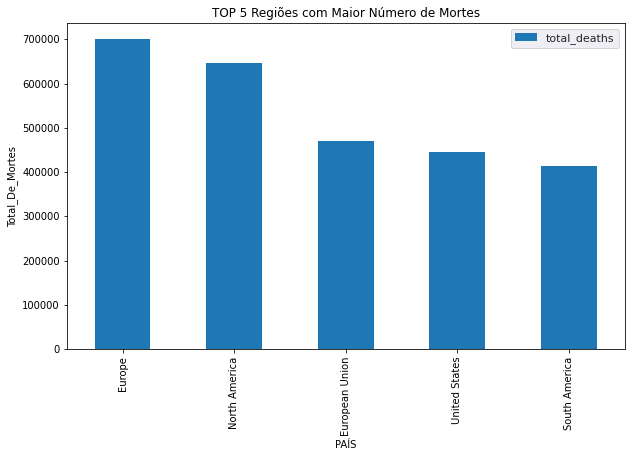

In [19]:
#top5_total_deaths.plot(kind="bar");

fig, ax =plt.subplots(figsize=(10,6))

top5_total_deaths.plot(x="location",y="total_deaths",kind="bar", ax=ax,)
sns.set_theme(style="darkgrid")


ax.set_title("TOP 5 Regiões com Maior Número de Mortes")
ax.set_xlabel("PAÍS")
ax.set_ylabel("Total_De_Mortes")

ax.legend()
plt.show()
#Estou tentando mudar a cor das barras, ficar uma diferente da outra.


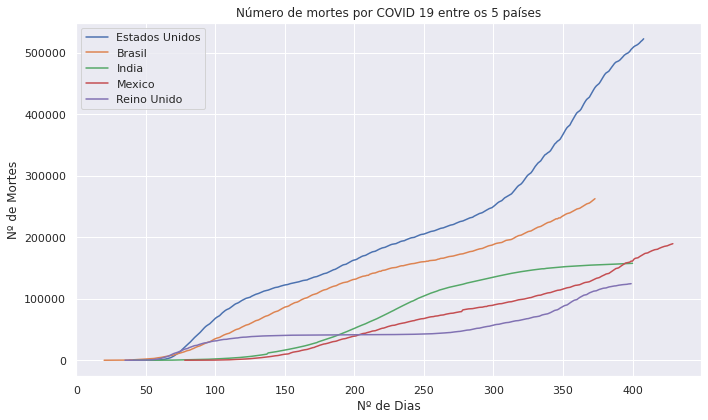

In [20]:
#Plotando os dados dos 5 países com maior número de mortes.

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df_world.loc[df_world.location == "United States","total_deaths"].reset_index(drop=True),label='Estados Unidos')
plt.plot(df_world.loc[df_world.location == "Brazil", "total_deaths"].reset_index(drop=True),label='Brasil')
plt.plot(df_world.loc[df_world.location == 'India','total_deaths'].reset_index(drop=True),label='India')
plt.plot(df_world.loc[df_world.location == 'Mexico','total_deaths'].reset_index(drop=True),label='Mexico')
plt.plot(df_world.loc[df_world.location == 'United Kingdom','total_deaths'].reset_index(drop=True),label='Reino Unido')

#Declaração dos eixos para melhor entendimento

plt.title("Número de mortes por COVID 19 entre os 5 países")
plt.xlabel("Nº de Dias")
plt.ylabel("Nº de Mortes")
plt.legend()
plt.tight_layout()
plt.show()

Por meio desse gráfico de dispersão é possível notar um destaque desde o início dos Estados Unidos, alcanca nos primeiros 100 dias a marca de quase 100 mil casos de pessoas mortas; Com o Brasil no mesmo período alcançando aproximadamente metade do quantitativo.

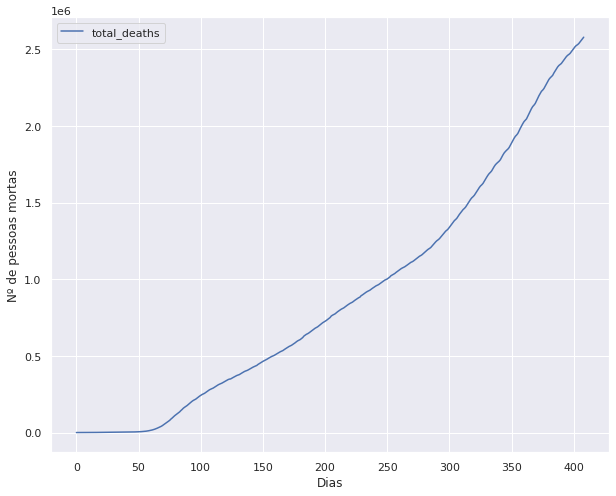

In [21]:
df_world.loc[df_world.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(10,8));
plt.xlabel("Dias")
plt.ylabel("Nº de pessoas mortas")
plt.legend()
plt.show()

Com esse gráfico é possível notar que o valor chegou a 2.5 milhões de mortos por covid desde o início dos registros sobre essa doença.

No handles with labels found to put in legend.


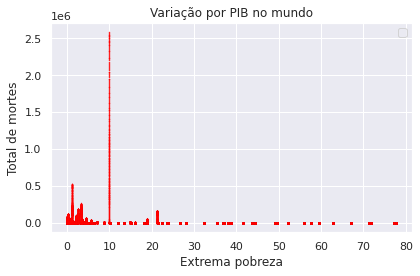

In [22]:
#Para essa parte eu tenho que pesquisar sobre o DF.loc, para buscar com mais precisão os detalhes como extrema pobreza e o número total de mortes
fig, ax=plt.subplots()

df_world.plot.scatter(x='extreme_poverty',y='total_deaths',ax=ax,s=.2,c='red');
ax.set_title("Variação por PIB no mundo")
ax.set_xlabel("Extrema pobreza")
ax.set_ylabel("Total de mortes")
ax.legend()
plt.tight_layout()
plt.show();



Ao agrupar os dados por diferentes características de cada região, foi possível perceber que os casos onde houveram mais mortes foi onde o índice de extrema pobreza atingia se demonstrou alto acima do 1% e com um pico nos 10%.

<center><img alt="Homeless_man" src = "https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/homeless-man.jpg" width = "50%"></center>

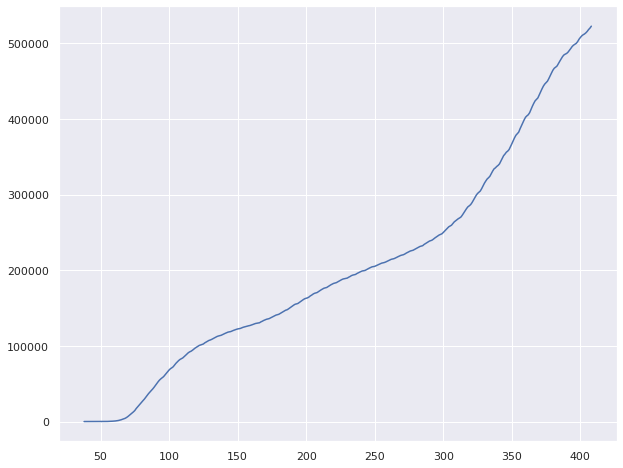

In [23]:
df_world.loc[df_world.location == 'United States','total_deaths'].reset_index(drop=True).plot(figsize=(10,8));
#Bem, isso foi uma baita descoberta, para quem está com dificuldades kkkk


In [ ]:
### O que deve ser feito depois de conseguir esses plots é gerar as perguntas 
###que sejam respondidas por esses plots e depois focar nos dados disponíveis do Brasil

In [24]:
df_wcopy.set_index('date').isnull().sum(level=0)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24,0,9,0,12,12,21,44,40,21,13,13,22,45,41,22,52,55,55,56,56,45,41,41,45,39,39,47,50,34,9,1,9,8,9,8,9,24,8,9,12,12,43,9,8,9
2020-02-25,0,9,0,12,12,26,49,45,26,13,13,27,50,46,27,57,60,60,60,60,44,43,43,44,43,43,52,55,38,9,1,9,8,9,8,9,24,8,9,12,12,46,9,8,9
2020-02-26,0,9,0,13,13,31,56,52,31,14,14,32,57,53,32,64,66,66,66,66,49,46,46,49,50,50,58,62,43,10,1,9,8,9,9,9,25,8,9,13,13,52,9,8,9
2020-02-27,0,9,0,12,12,34,59,55,34,13,13,35,60,56,35,66,66,66,67,67,49,48,48,49,52,52,59,63,44,10,1,9,9,10,10,9,27,9,9,14,14,55,9,8,10
2020-02-28,0,9,0,11,11,36,63,59,36,12,12,37,64,60,37,70,70,70,71,71,52,51,51,52,56,56,63,67,47,10,1,9,9,10,10,9,30,9,9,14,14,57,11,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-08,0,7,0,9,9,11,38,34,11,10,10,11,38,34,11,40,41,41,41,41,34,34,34,34,33,33,35,38,27,7,1,7,6,7,6,7,17,6,7,7,7,33,7,6,7
2020-02-09,0,7,0,15,15,16,44,40,16,16,16,16,44,40,16,46,47,47,47,47,40,40,40,40,37,37,41,44,33,7,1,7,6,7,6,7,19,6,7,7,7,39,7,6,7
2020-02-10,0,7,0,9,9,10,38,34,10,10,10,10,38,34,10,40,41,41,41,41,34,34,34,34,31,31,35,38,27,7,1,7,6,7,6,7,17,6,7,7,7,33,7,6,7


## Dados do Covid-19 no Brasil
Nesta seção do projeto, o foco será a análise dos dados sobre o covid-19 no Brasil, identificando fatores que podem ou não estar correlacionados.

<center><img alt="bandeira_brazil" width='60%' src = "https://github.com/Yanni-Dhevictor/img/blob/main/flag-of-brazil.jpg?raw=true"><center/>



Começando pela progressão do Covid desde o primeiro caso registrado até o último dado obtido contido no dataset.
Atingindo uma marca de total de mortos por COVID-19 de 250 mil casos no final do ano de 2020. 

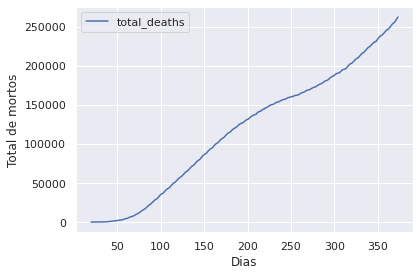

In [25]:
df_world.loc[df_world.location == "Brazil", "total_deaths"].reset_index(drop=True).plot();
plt.xlabel('Dias')
plt.ylabel('Total de mortos')
plt.legend()
plt.tight_layout()
plt.show()

#Minha intenção é fazer uma única figura com multiplos plots, com os 5 países com o maior número de mortes. (EDIT: Já consegui, está lá embaixo :D)

In [29]:
#Definindo um novo dataframe com foco só nos dados relacionados ao Brasil
df_Brazil = df_world.loc[df_world.location == "Brazil"].reset_index(drop=True)

In [41]:
#Atribuindo o índice para a coluna Data
df_Brazil.set_index('date',inplace=True)

Nessa etapa, assim como no início desse projeto, é abordade uma descrição resumida dos dados do Brasil quanto ao COVID-19

In [27]:
#Descrição do resumo estatístico
df_Brazil.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,3.740000e+02,374.000000,369.000000,354.000000,354.000000,369.00000,374.000000,374.000000,369.000000,354.000000,354.000000,369.000000,355.000000,0.0,0.0,0.0,0.0,0.0,1.600000e+01,16.000000,0.0,82.000000,82.000000,0.0,0.0,335.000000,374.0,3.740000e+02,374.0,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,0.0,3.740000e+02,3.740000e+02,3.740000e+02
mean,3.962926e+06,29062.104278,28913.666301,117415.192090,742.288136,698.89858,18643.851217,136.724607,136.026285,552.387641,3.492141,3.288022,1.183465,NaN,NaN,NaN,NaN,NaN,3.181557e+06,14.967813,NaN,52873.378049,0.248756,NaN,NaN,67.264448,212559409.0,2.504000e+01,33.5,8.552000e+00,5.060000e+00,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01
std,3.337830e+06,20936.496125,16685.880747,78678.536184,433.415177,352.50626,15703.043987,98.497125,78.499880,370.148435,2.039035,1.658381,0.311416,NaN,NaN,NaN,NaN,NaN,2.059308e+06,9.688130,NaN,24083.824628,0.113345,NaN,NaN,15.255708,0.0,8.182188e-14,0.0,2.312357e-14,3.913220e-14,5.282136e-11,4.891525e-15,1.195311e-12,1.245115e-14,6.225577e-14,1.031667e-13,NaN,1.200647e-14,2.419082e-13,7.337288e-15
min,1.000000e+00,0.000000,0.286000,1.000000,0.000000,0.00000,0.005000,0.000000,0.001000,0.005000,0.000000,0.000000,0.930000,NaN,NaN,NaN,NaN,NaN,6.298500e+04,0.296000,NaN,5345.000000,0.025000,NaN,NaN,5.560000,212559409.0,2.504000e+01,33.5,8.552000e+00,5.060000e+00,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01
25%,4.734845e+05,11726.000000,17447.286000,42873.000000,426.250000,483.57100,2227.539750,55.165500,82.082000,201.698750,2.005000,2.275000,1.010000,NaN,NaN,NaN,NaN,NaN,1.962835e+06,9.234750,NaN,33280.250000,0.156750,NaN,NaN,63.430000,212559409.0,2.504000e+01,33.5,8.552000e+00,5.060000e+00,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01
50%,3.885292e+06,26953.500000,30816.714000,129030.500000,704.500000,742.85700,18278.614500,126.805000,144.979000,607.032500,3.314000,3.495000,1.060000,NaN,NaN,NaN,NaN,NaN,2.997547e+06,14.102000,NaN,56343.500000,0.265000,NaN,NaN,69.910000,212559409.0,2.504000e+01,33.5,8.552000e+00,5.060000e+00,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01
75%,6.424184e+06,45821.500000,42532.000000,177223.000000,1122.750000,1007.42900,30223.006000,215.570500,200.095000,833.757750,5.282000,4.740000,1.175000,NaN,NaN,NaN,NaN,NaN,4.894399e+06,23.025750,NaN,71711.500000,0.337000,NaN,NaN,77.310000,212559409.0,2.504000e+01,33.5,8.552000e+00,5.060000e+00,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01
max,1.086923e+07,87843.000000,59085.286000,262770.000000,1986.000000,1419.28600,51135.008000,413.263000,277.971000,1236.219000,9.343000,6.677000,2.370000,NaN,NaN,NaN,NaN,NaN,6.421441e+06,30.210000,NaN,98318.000000,0.463000,NaN,NaN,81.020000,212559409.0,2.504000e+01,33.5,8.552000e+00,5.060000e+00,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,NaN,2.

Por meio dela percebemos os seguintes detalhes:

* 25% dos dados dos novos casos recebidos correspondem a 11726
* Que a média de novas mortes estão na casa dos 704 mortes até a última atualização desse dataset.
* Com número máximo de 262770 mil casos de pessoas mortas pelo vírus.
* E média de pib_per_capita de R$ 1.410,34

In [30]:
#5 Primeiras entradas do Brasil
df_Brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
1,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
2,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
3,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
4,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


###Analisando dados faltantes nos casos apontados do Brasil

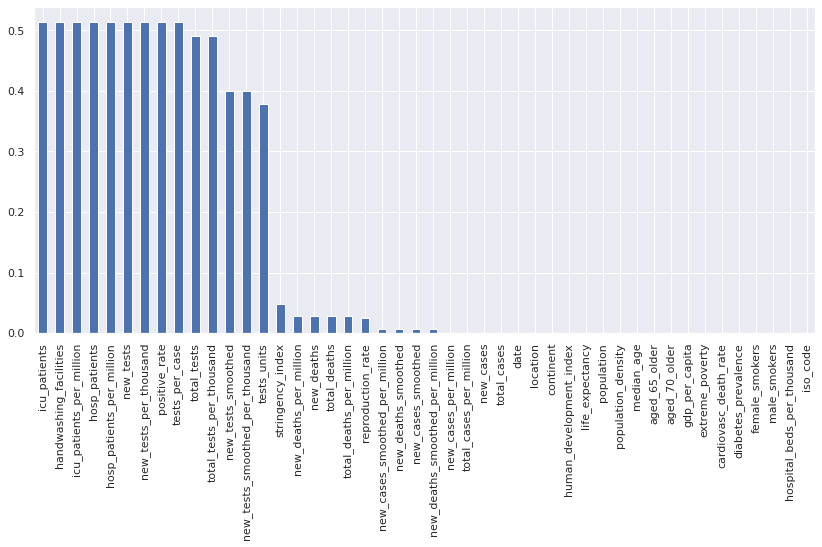

In [ ]:
#Identificando a % de valores ausentes de cada atributo do dataset
((df_Brazil.isnull().sum() / df_wcopy.shape[0]).sort_values(ascending=False) * 100).plot(kind='bar',figsize=(14,6));


Na casa dos 50% de dados faltantes dos vemos informações como número de pacientes em unidades de tratamento intensivo(`icu_patients`), parcela da população com instalações básicas de lavagem das mãos no local (`handwashing_facilities`), pacientes hospitalizados(`hosp_patients`), entre outras informações.



Com isso já é capaz de compreender a diferença das instalações do Brasil, estruturas que não puderam cumprir com os requisitos mínimos necessários para o dataset além de que nem todos os cidadãos terão o mesmo acesso a um tratamento da saúde adequado.

<center><img alt="reception"  src="https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/hospital_reception.jpg" width = 60%></center>

####Relação de número de pessoas mortas X pib_per_capita do Brasil.

No handles with labels found to put in legend.


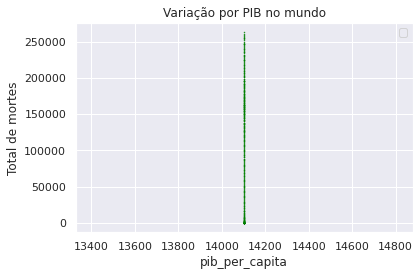

In [44]:
#Plotando a variação do PIB por total de mortos
fig, ax=plt.subplots()

df_Brazil.plot.scatter(x='gdp_per_capita',y='total_deaths',ax=ax,s=.2,c='green');
ax.set_title("Variação por PIB no mundo")
ax.set_xlabel("pib_per_capita")
ax.set_ylabel("Total de mortes")
ax.legend()
plt.tight_layout()
plt.show();

Por meio desse gráfico é perceptível que dentro do total de mortes, o valor do pib_per_capita do Brasil varia em torno de 1400 a 14200 reais, que equivale atualmente( R$1.045 ) a 1,5 salário mínimo. 

* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

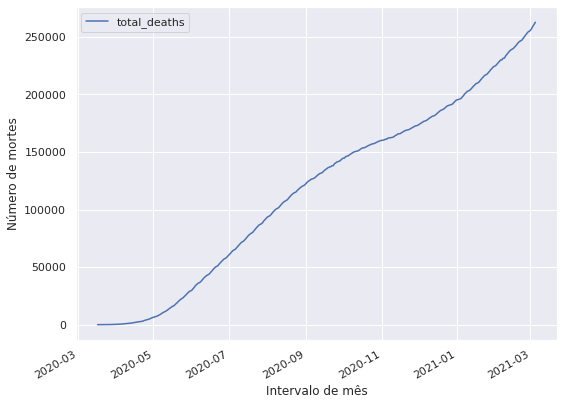

In [57]:
#Plotando o gráfico da evolução do Covid-19

fig, ax = plt.subplots(figsize=(8,6))

ax.plot('total_deaths',data=df_Brazil);
ax.set_xlabel('Intervalo de mês')
ax.set_ylabel('Número de mortes')
plt.legend()
plt.tight_layout()
fig.autofmt_xdate()

plt.show()

###Conclusão

Tanto no Brasil como no resto do mundo o Covid-19 causou atrasos na saúde, sobrecarga de sistemas que em algum países já estavam sobre alta carga e outras marcas mais doloridas, como a perda de entes queridos, contabiliando milhares de mortes por todo o globo.

Por meio desse projeto foi possível ver a progressão de alguns pontos que identifiquei como importantes para uma investigação mais concisa e melhor entendimento por meio da geração das visualizações gráficas, possibilitando entender melhor os impactos e como os dados reunidos podem ser úteis para identificar os padrões que possível causalidades/correlações.

Esse projeto teve o objetivo de analisar os dados públicos disponíveis sobre essa doença no mundo e sua progressão com o tempo, enquanto o mundo está tentando recuperar o seu antigo fôlego.

<center><img alt='vaccine' src="https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/vaccine.jpg" width = "60%"></center>